In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the CSV dataset
csv_file_path = "../dataset/europe_dataset.csv"

# Read the CSV file
df = pd.read_csv(csv_file_path)

In [26]:
#Create new columns
df['total_fatalities'] = df['fatal_pc_km'] * df['p_km']
df['total_accidents'] = df['accid_adj_pc_km'] * df['p_km']
df['fatality_likelihood_p_km'] = (df['fatal_pc_km']/df['accid_adj_pc_km'])*100

In [31]:
df.head(20)

,Unnamed: 0,country,year,fatal_pc_km,fatal_mIn,accid_adj_pc_km,p_km,croad_inv_km,croad_maint_km,prop_motorwa,...,cgdp,cgdp_cap,precipit,prop_elder,dps,freight,total_fatalities,total_accidents,fatality_likelihood_p_km,total_road_spending
0,0,Austria,1998,11.44,93.09,242.56,64.86,5523.00,6845.95,1.52,...,2.786600e+15,34959.08,1374.86,15.36,0.0,30.30,741.9984,15732.4416,4.716359,12368.95
1,1,Austria,1999,12.39,102.60,231.60,66.11,5012.59,6756.10,1.54,...,2.758600e+15,34558.19,1429.48,15.41,0.0,33.98,819.1029,15311.0760,5.349741,11768.69
2,2,Austria,2000,11.38,94.85,252.17,66.67,5937.96,6350.49,1.53,...,2.851400e+15,35632.89,1329.12,15.42,0.0,35.12,758.7046,16812.1739,4.512829,12288.45
3,3,Austria,2001,11.06,92.51,248.99,67.10,7821.22,6354.74,1.54,...,2.857200e+15,35622.19,1138.35,15.43,0.0,37.53,742.1260,16707.2290,4.441945,14175.96
4,4,Austria,2002,10.17,85.69,250.69,67.96,6387.88,3530.14,1.54,...,2.878100e+15,35692.52,1308.67,15.49,0.0,38.50,691.1532,17036.8924,4.056803,9918.02
5,5,Austria,2003,10.27,87.40,242.37,68.94,7705.60,4599.65,1.56,...,2.929700e+15,36167.35,982.83,15.44,0.0,39.56,708.0138,16708.9878,4.237323,12305.25
6,6,Austria,2004,9.28,79.34,249.22,69.61,8332.48,5300.38,1.56,...,3.010700e+15,36975.15,1108.93,15.49,0.0,39.19,645.9808,17348.2042,3.723618,13632.86
7,7,Austria,2005,8.02,69.01,236.94,70.56,7776.70,5014.67,1.56,...,3.096200e+15,37752.40,1115.98,15.95,1.0,37.04,565.8912,16718.4864,3.384823,12791.37
8,8,Austria,2006,7.48,64.21,221.35,70.89,8935.10,5514.81,1.56,...,3.186300e+15,38602.30,1161.19,16.45,1.0,39.19,530.2572,15691.5015,3.379264,14449.91
9,9,Austria,2007,7.19,62.54,205.74,72.02,9370.59,5234.61,1.56,...,3.317200e+15,40047.84,1258.92,16.89,1.0,37.40,517.8238,14817.3948,3.494702,14605.20


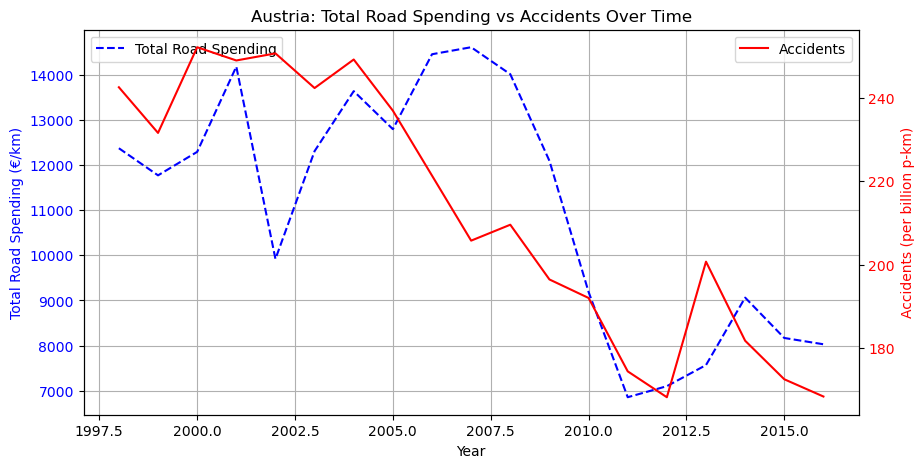

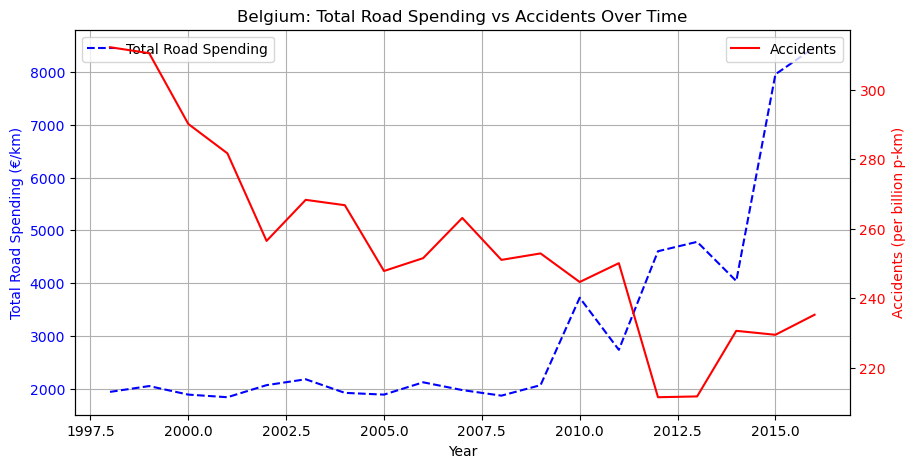

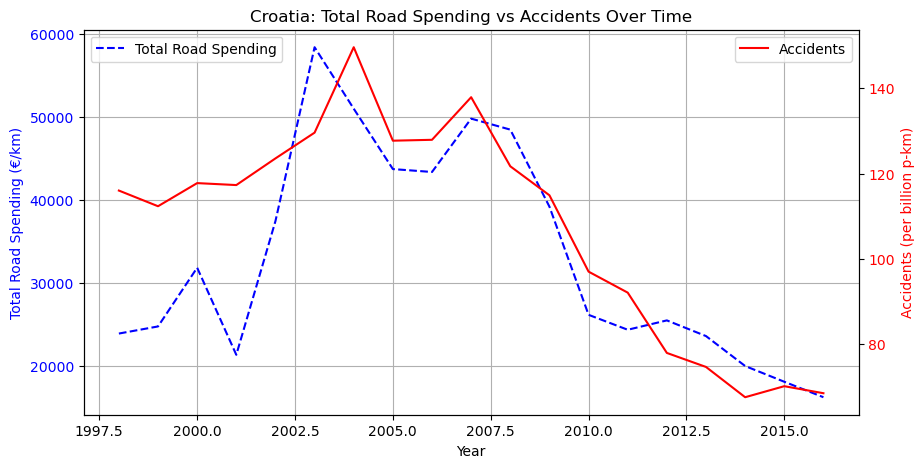

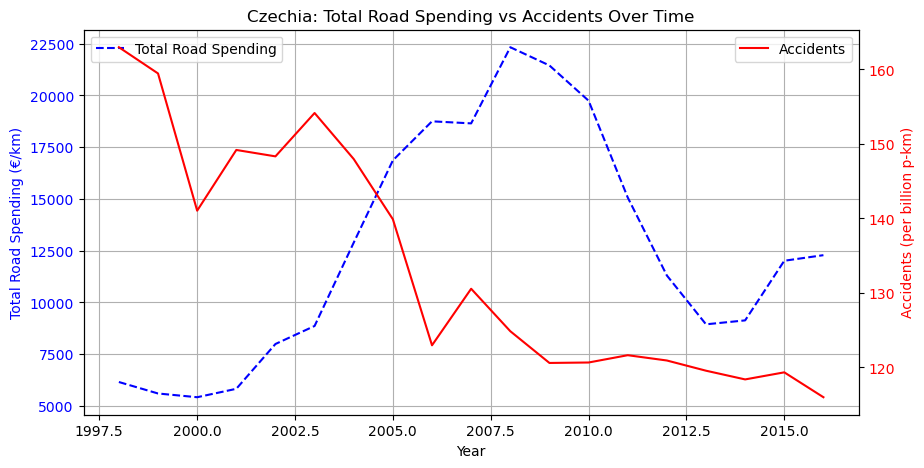

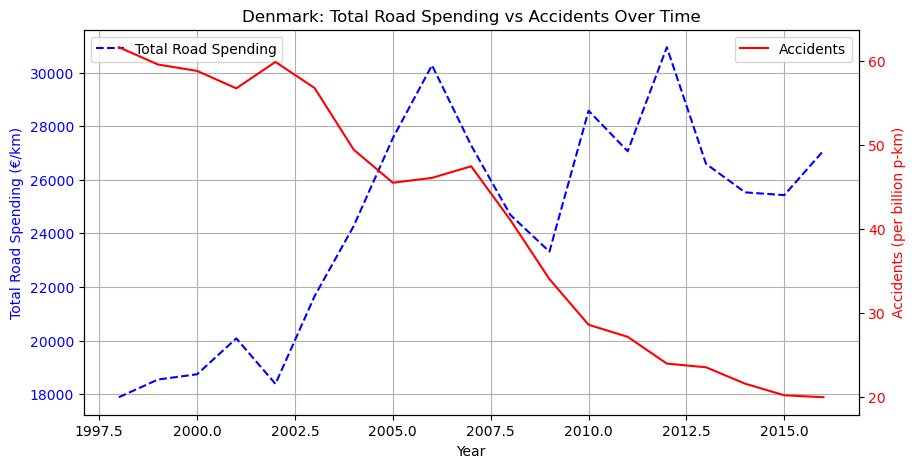

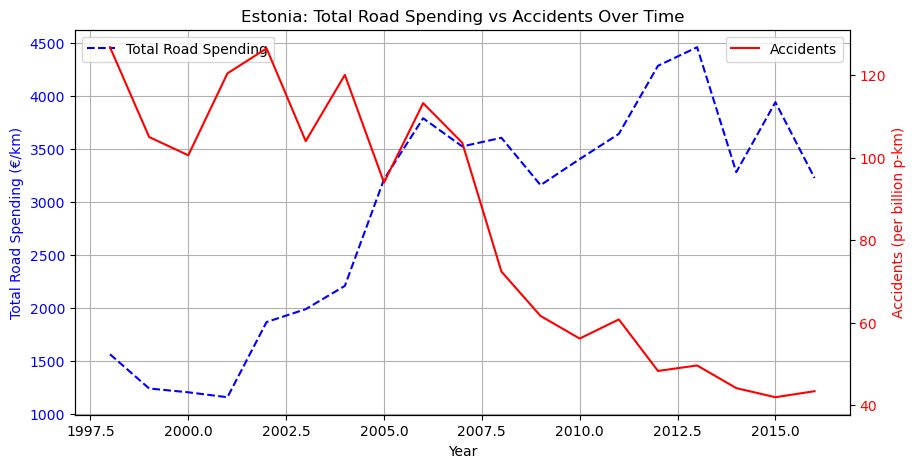

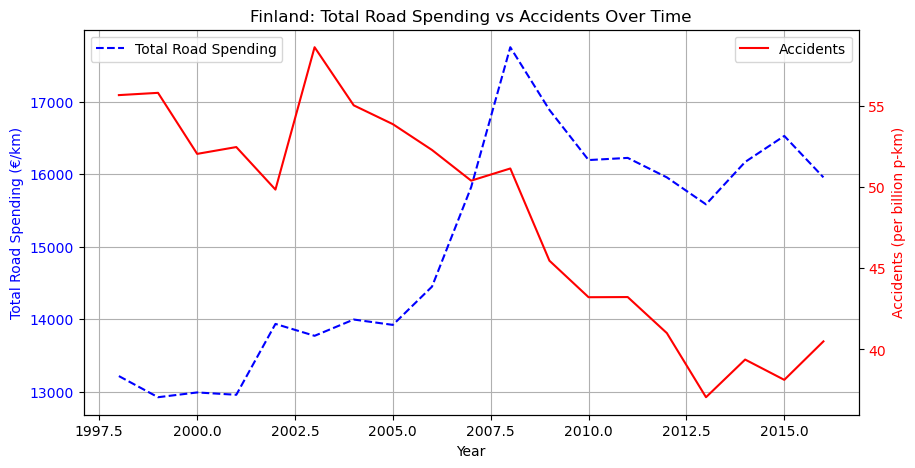

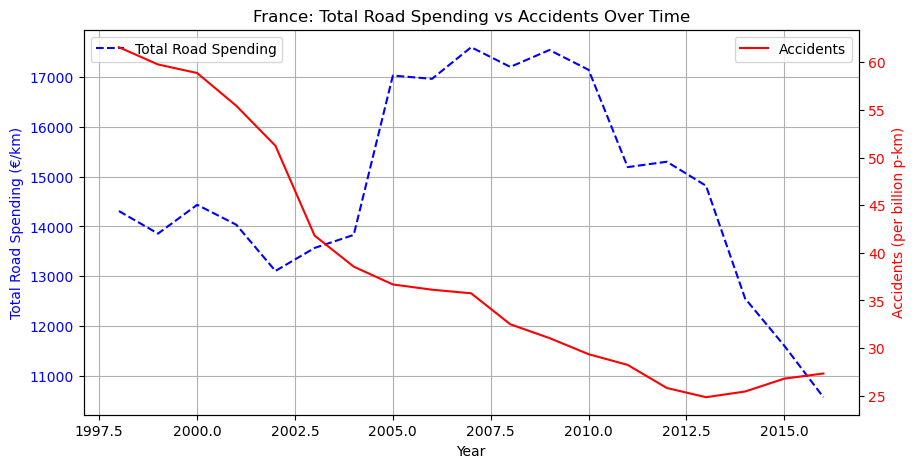

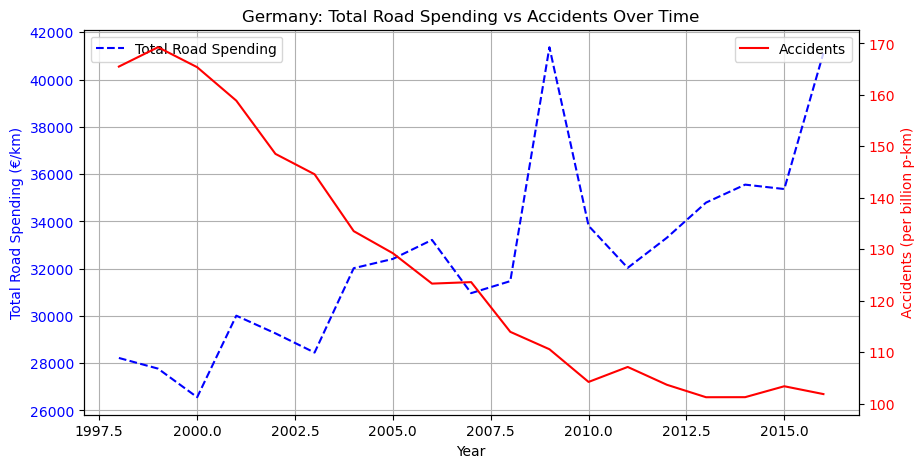

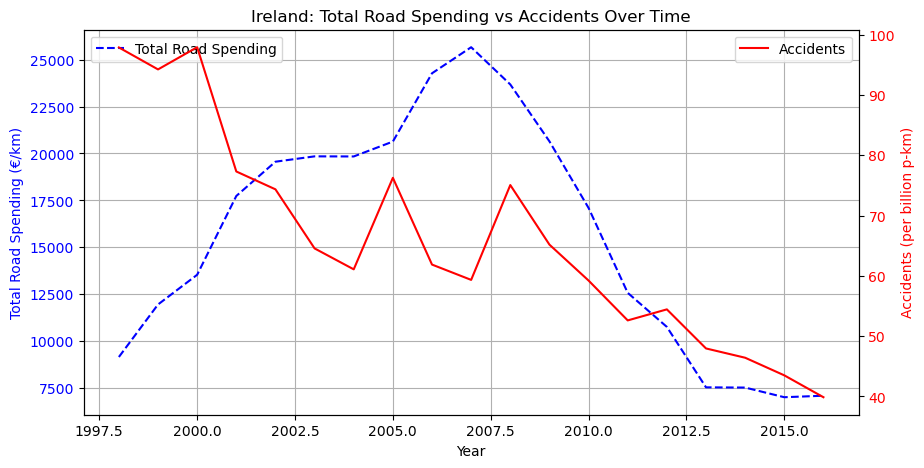

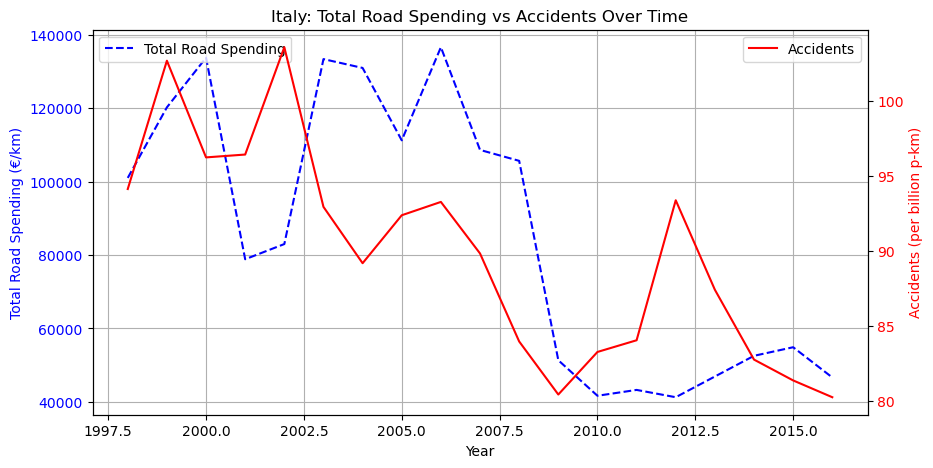

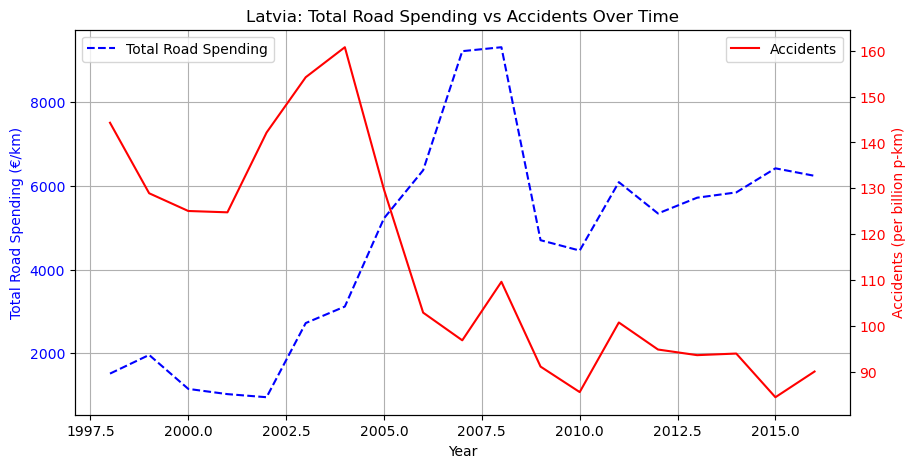

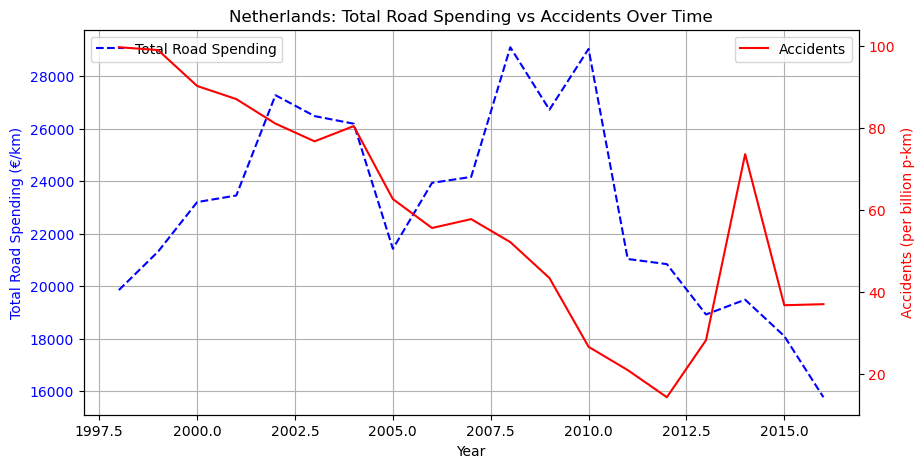

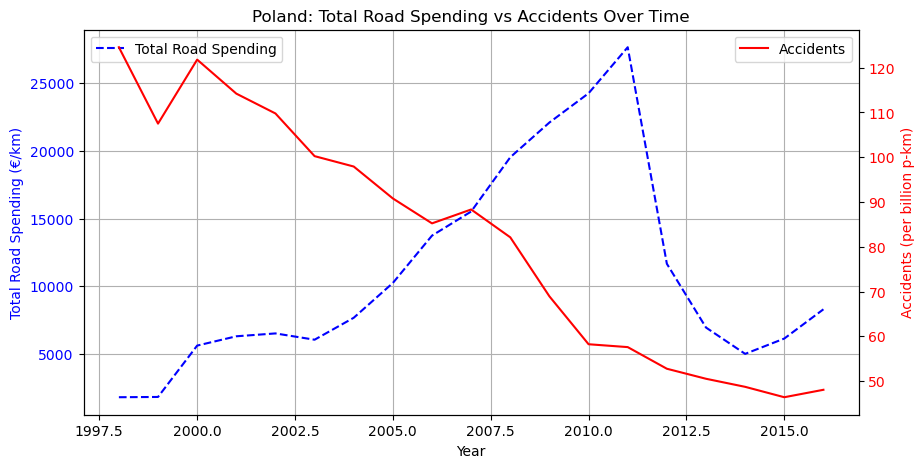

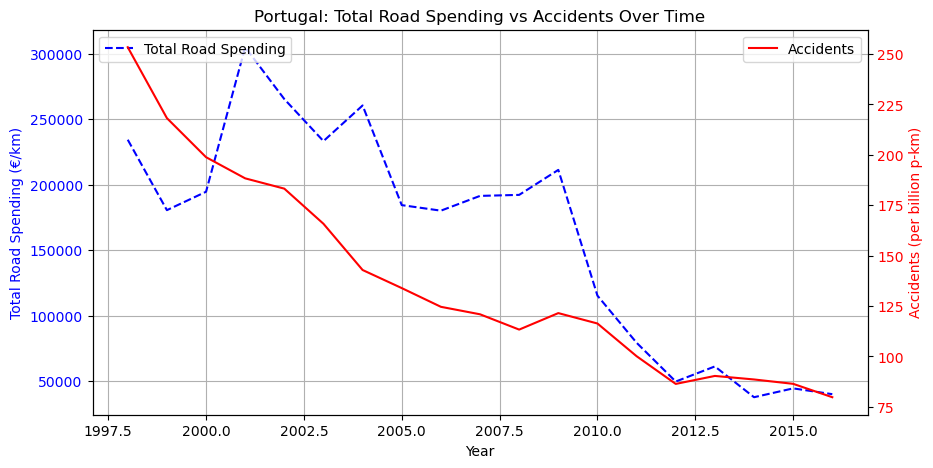

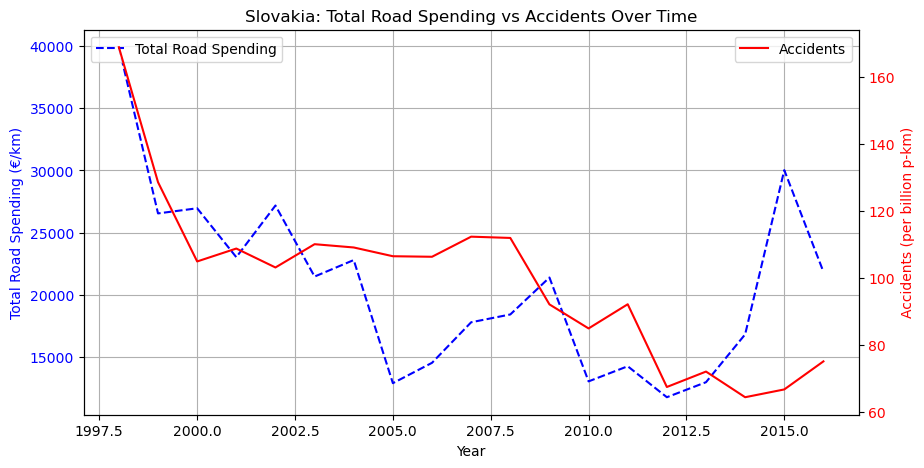

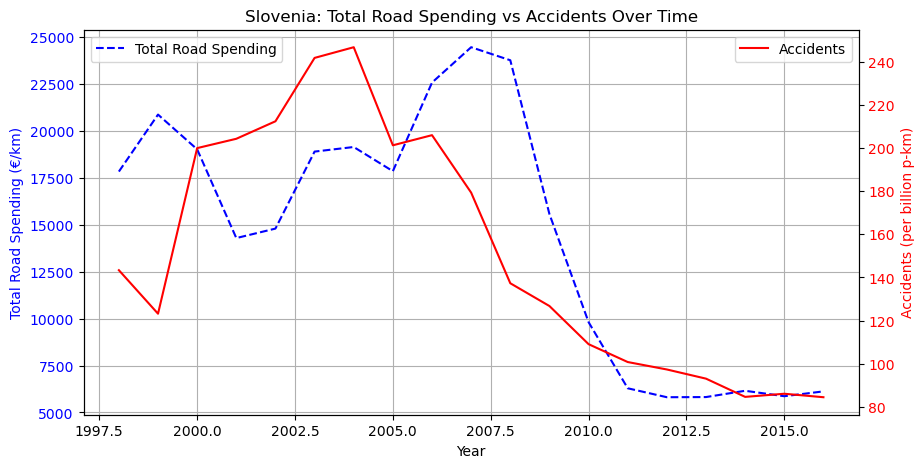

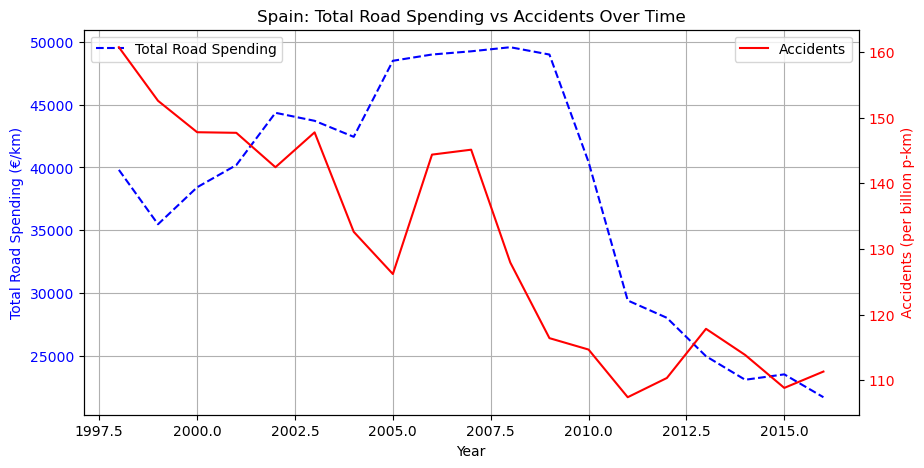

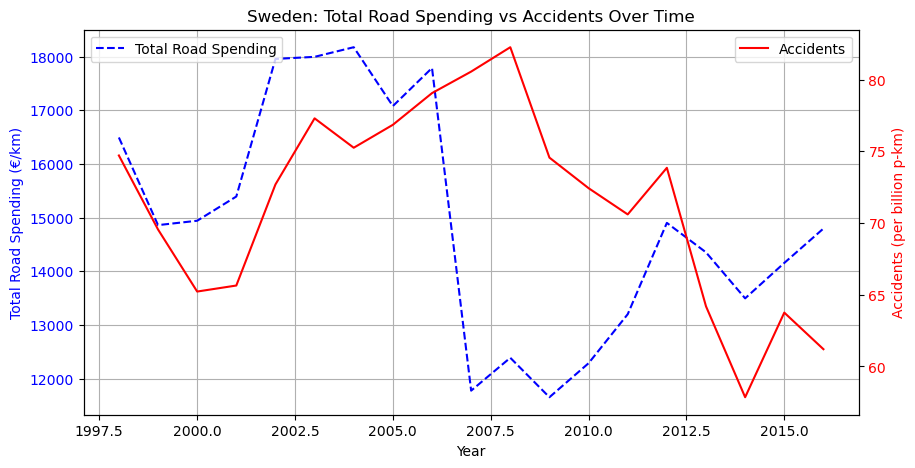

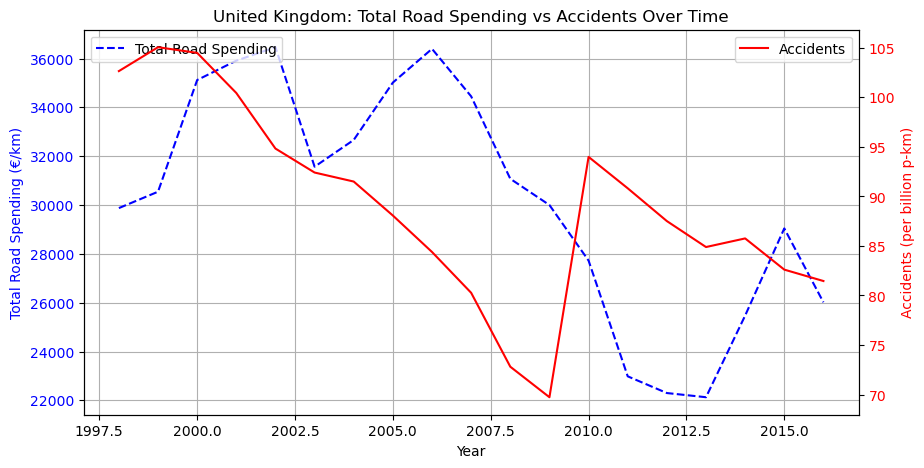

In [24]:
# Create a new column for total road spending
df['total_road_spending'] = df['croad_inv_km'] + df['croad_maint_km']

# Select relevant columns
cols = ['year', 'country', 'total_road_spending', 'accid_adj_pc_km']
df_subset = df[cols].dropna()

# Loop through each country and plot
for country in df_subset['country'].unique():
    df_country = df_subset[df_subset['country'] == country]

    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Primary Y-axis (Total Road Spending)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Total Road Spending (€/km)", color='blue')
    ax1.plot(df_country['year'], df_country['total_road_spending'], label="Total Road Spending", linestyle='dashed', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Secondary Y-axis (Accidents)
    ax2 = ax1.twinx()
    ax2.set_ylabel("Accidents (per billion p-km)", color='red')
    ax2.plot(df_country['year'], df_country['accid_adj_pc_km'], label="Accidents", linestyle='solid', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and grid
    plt.title(f"{country}: Total Road Spending vs Accidents Over Time")
    ax1.grid(True)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()